Total frauds :612
Right Prediction:57.51633986928104
Percentage of frauds detected out of total actual frauds:91.90600522193212
Percentage of fraud customers in population as claimed by prediction model:51.01449275362319
Actual precentage of frauds out of total population:55.507246376811594
Affected population(percentage of custormers who were not fraud but were predicted as fraud)):37.68115942028986


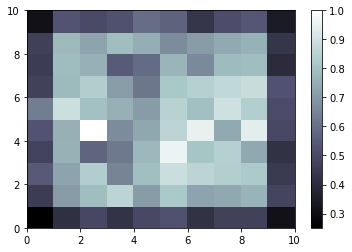

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import *

dataset = pd.read_csv(r'C:\Manju\Trierdocs\Semester3\CrediCardFraudDetectionApplicationNEW.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 16, sigma = 1.0, learning_rate = 0.1, neighborhood_function = 'bubble')
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

from pylab import bone, pcolor, colorbar
bone()
distance_map = som.distance_map().round(1)
distance_map

index = []
for i in range(10):
    for j in range(10):
        if(distance_map[i,j]>=0.5):
            index.append([i,j])
len(index)

pcolor(som.distance_map().T)
colorbar() #gives legend

mappings = som.win_map(X)
mappings.keys()

fraud_list = []
sum = 0
for x in index:
    fraud_list.append(mappings[(x[0],x[1])])
    sum = sum + len(mappings[(x[0],x[1])])
sum

frauds = []
for x in fraud_list:
    for y in x:
        frauds.append(y)

        
fraud_array = np.asarray(frauds)
fraud_inverse_transformed = sc.inverse_transform(frauds)


count = 0
fraud_id_list = []
for x in fraud_inverse_transformed:
    fraud_id_list.append(x[0])
print('Total frauds :{}'.format(len(fraud_id_list)))

count = 0
right_prediction_index =[]
wrong_prediction_index =[]
for x in fraud_id_list:
    for i,y in enumerate(dataset['CustomerID']):
        if(x == y):
            if(dataset['Class'][i] == 0):
                count = count+1
                right_prediction_index.append(i)
            else:
                wrong_prediction_index.append(i)
                
a = len(right_prediction_index)
a

b=len(wrong_prediction_index)
b

l = len(fraud_id_list)

print('Right Prediction:{}'.format((a/l)*100))

total_population = dataset.shape[0]
total_actual_frauds  = dataset[dataset['Class'] == 0].shape[0]

print('Percentage of frauds detected out of total actual frauds:{}'.format((a/total_actual_frauds)*100))
print('Percentage of fraud customers in population as claimed by prediction model:{}'.format((a/total_population)*100))
print('Actual precentage of frauds out of total population:{}'.format((total_actual_frauds/total_population)*100))
print('Affected population(percentage of custormers who were not fraud but were predicted as fraud)):{}'.format((b/690)*100))